#Data

https://drive.google.com/file/d/19lyUUPfmkLCh27aHJIHNYjZwWmompsuG/view?usp=sharing


#Downloading data

In [ ]:
!gdown --id 19lyUUPfmkLCh27aHJIHNYjZwWmompsuG

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19lyUUPfmkLCh27aHJIHNYjZwWmompsuG
From (redirected): https://drive.google.com/uc?id=19lyUUPfmkLCh27aHJIHNYjZwWmompsuG&confirm=t&uuid=754c24d1-9ea3-488f-b8fe-9c4a75ce19e5
To: /content/Brats2019.zip
100% 66.0M/66.0M [00:00<00:00, 66.2MB/s]


# Unzip

In [ ]:
!unzip Brats2019.zip

Archive:  Brats2019.zip
  inflating: dataset/test/N1.jpeg    
  inflating: dataset/test/N2.jpeg    
  inflating: dataset/test/N3.jpg     
  inflating: dataset/test/Y1.jpg     
  inflating: dataset/test/Y2.jpg     
  inflating: dataset/test/Y3.jpg     
  inflating: dataset/train/no/No12.jpg  
  inflating: dataset/train/no/No13.jpg  
  inflating: dataset/train/no/No14.jpg  
  inflating: dataset/train/no/No15.jpg  
  inflating: dataset/train/no/No17.jpg  
  inflating: dataset/train/no/No18.jpg  
  inflating: dataset/train/no/No19.jpg  
  inflating: dataset/train/no/no0.jpg  
  inflating: dataset/train/no/no1.jpg  
  inflating: dataset/train/no/no10.jpg  
  inflating: dataset/train/no/no100.jpg  
  inflating: dataset/train/no/no1000.jpg  
  inflating: dataset/train/no/no1001.jpg  
  inflating: dataset/train/no/no1002.jpg  
  inflating: dataset/train/no/no1003.jpg  
  inflating: dataset/train/no/no1004.jpg  
  inflating: dataset/train/no/no1005.jpg  
  inflating: dataset/train/no/no1006.jpg

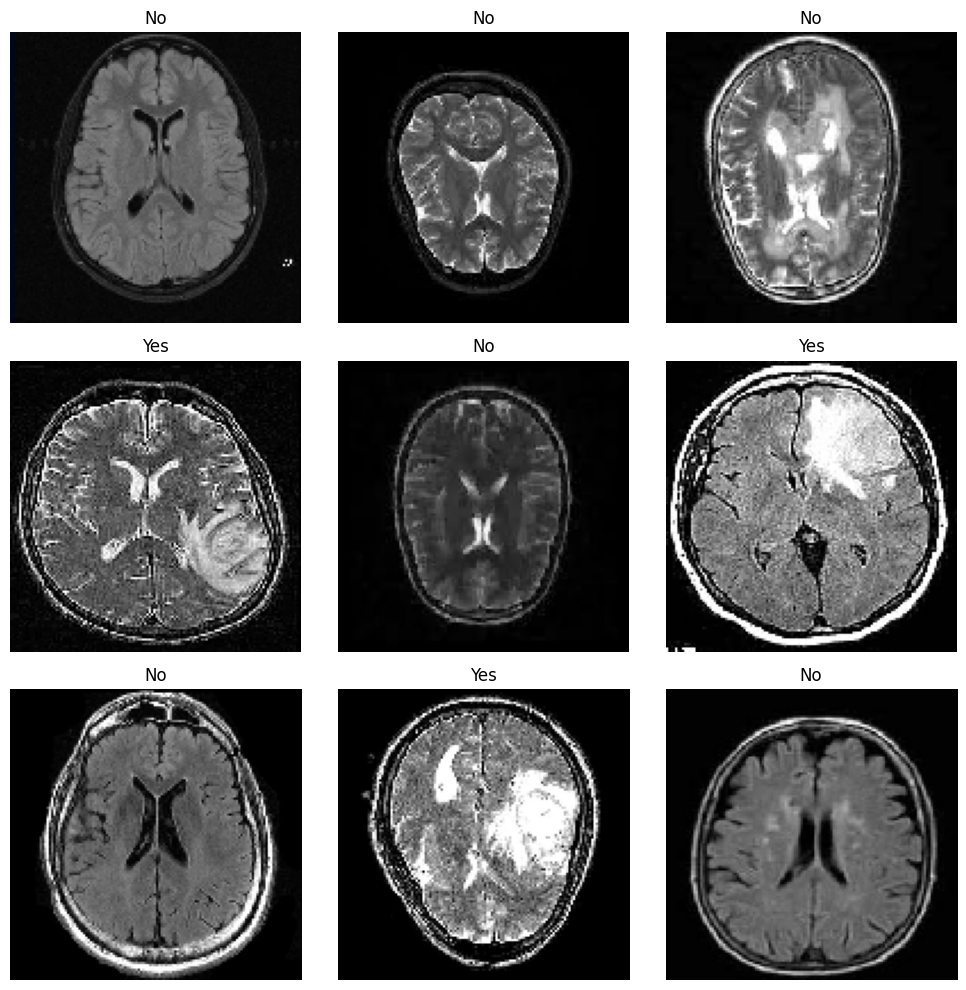

Training set: 2240 images
Validation set: 200 images
Test set: 560 images


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


def load_data(base_path):
    images = []
    labels = []

    for label, subfolder in enumerate(["no", "yes"]):
        folder_path = os.path.join(base_path, subfolder)
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(label)

    images = np.array(images, dtype="float32") / 255.0  # Normalize images to [0, 1]
    labels = np.array(labels)
    return images, labels


train_images, train_labels = load_data("dataset/train")
valid_images, valid_labels = load_data("dataset/valid")



train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator()


train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
valid_generator = valid_datagen.flow(valid_images, valid_labels, batch_size=32)


def visualize_data(images, labels, class_names=['No', 'Yes']):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        index = np.random.randint(0, len(images))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[index])
        plt.title(class_names[labels[index]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_data(train_images, train_labels)

print(f"Training set: {len(train_images)} images")
print(f"Validation set: {len(valid_images)} images")
print(f"Test set: {len(test_images)} images")

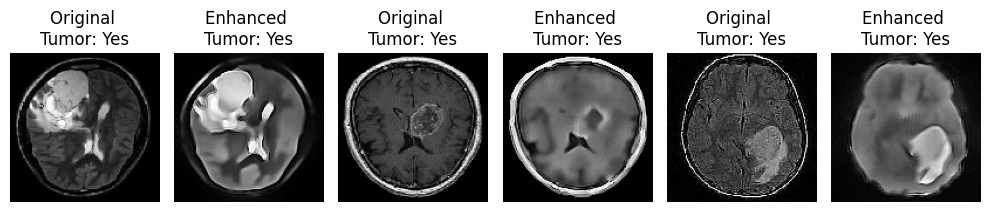

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_preprocessed_images(images,labels, class_names=['Original', 'Enhanced'], n_samples=3, clebel=['No', 'Yes']):
    plt.figure(figsize=(10, 10))

    for i in range(n_samples):
        index = np.random.randint(0, len(images))
        latest_image = images[index]

        if latest_image.dtype != np.uint8:
            latest_image = cv2.normalize(latest_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        if len(latest_image.shape) == 3:
            latest_image = cv2.cvtColor(latest_image, cv2.COLOR_BGR2GRAY)

        # Apply a median filter to reduce noise
        denoised_image = cv2.medianBlur(latest_image, 5)

        # Apply Non-Local Means Denoising for further noise reduction
        nlm_denoised_image = cv2.fastNlMeansDenoising(denoised_image, None, h=10, templateWindowSize=7, searchWindowSize=21)

        # Apply a sharpening filter to enhance edges
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        sharpened_image = cv2.filter2D(nlm_denoised_image, -1, kernel)

        # Apply adaptive contrast enhancement to avoid over-brightening
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        contrast_enhanced_image = clahe.apply(sharpened_image)


        ax = plt.subplot(3, 6, 2 * i + 1)
        plt.imshow(latest_image, cmap='gray')
        plt.title(class_names[0] + " \nTumor: " + clebel[labels[index]])
        plt.axis("off")

        ax = plt.subplot(3, 6, 2 * i + 2)
        plt.imshow(contrast_enhanced_image, cmap='gray')
        plt.title(class_names[1] + " \nTumor: " + clebel[labels[index]])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

visualize_preprocessed_images(train_images,labels = train_labels, n_samples=3)

In [ ]:
def create_two_pathway_model():
    input_layer = tf.keras.Input(shape=(128, 128, 3))

    # Local Pathway
    local_conv1 = tf.keras.layers.Conv2D(32, (7, 7), activation='relu', padding='same')(input_layer)
    local_pool1 = tf.keras.layers.MaxPooling2D((2, 2))(local_conv1)
    local_conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(local_pool1)
    local_pool2 = tf.keras.layers.MaxPooling2D((4, 4))(local_conv2)

    # Global Pathway
    global_conv1 = tf.keras.layers.Conv2D(32, (13, 13), activation='relu', padding='same')(input_layer)
    global_pool1 = tf.keras.layers.MaxPooling2D((4, 4))(global_conv1)
    global_conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(global_pool1)
    global_pool2 = tf.keras.layers.MaxPooling2D((2, 2))(global_conv2)

    concatenated = tf.keras.layers.concatenate([local_pool2, global_pool2])

    # Output Layer
    conv_final = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated)
    flat = tf.keras.layers.Flatten()(conv_final)
    dense = tf.keras.layers.Dense(128, activation='relu')(flat)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

    model = tf.keras.Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


first_stage_model = create_two_pathway_model()

first_stage_history = first_stage_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=len(train_images) // 32,
    validation_steps=len(valid_images) // 32
)




Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.5515 - loss: 0.7331 - val_accuracy: 0.6094 - val_loss: 0.7053
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6982
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.6928 - loss: 0.6013 - val_accuracy: 0.5469 - val_loss: 0.7897
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3631
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.6798 - loss: 0.5949 - val_accuracy: 0.6094 - val_loss: 0.7976
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.8085
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.7139 - loss: 0.5647 - val_accuracy: 0.6771 - val_loss: 0.5892
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+

In [ ]:
first_stage_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 128, 128, 32)   │          4,736 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 128, 128, 32)   │         16,256 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 64, 64, 32)     │              0 │ conv2d_10[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 32, 32, 32)     │              0 │ conv2d_12[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 32, 32, 64)     │         18,496 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 16, 16, 64)     │              0 │ conv2d_11[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 16, 16, 64)     │              0 │ conv2d_13[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 16, 16, 128)    │              0 │ max_pooling2d_9[0][0], │
│ (Concatenate)             │                        │                │ max_pooling2d_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 16, 16, 128)    │        147,584 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 32768)          │              0 │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │      4,194,432 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │            129 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 13,200,389 (50.36 MB)

 Trainable params: 4,400,129 (16.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,800,260 (33.57 MB)

In [ ]:
first_stage_train_predictions = first_stage_model.predict(train_images)
first_stage_valid_predictions = first_stage_model.predict(valid_images)

#Prepare Cascaded Inputs

first_stage_train_predictions_resized = np.repeat(first_stage_train_predictions[:, np.newaxis, np.newaxis], 128, axis=1)
first_stage_train_predictions_resized = np.repeat(first_stage_train_predictions_resized, 128, axis=2)
train_inputs_cascade = np.concatenate([train_images, first_stage_train_predictions_resized], axis=-1)

first_stage_valid_predictions_resized = np.repeat(first_stage_valid_predictions[:, np.newaxis, np.newaxis], 128, axis=1)
first_stage_valid_predictions_resized = np.repeat(first_stage_valid_predictions_resized, 128, axis=2)
valid_inputs_cascade = np.concatenate([valid_images, first_stage_valid_predictions_resized], axis=-1)


def create_input_cascade_model():
    input_layer = tf.keras.Input(shape=(128, 128, 4))  # 3 original channels + 1 cascaded output channel

    # Output Layer
    conv1 = tf.keras.layers.Conv2D(32, (7, 7), activation='relu', padding='same')(input_layer)
    pool1 = tf.keras.layers.MaxPooling2D((2, 2))(conv1)
    conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    flat = tf.keras.layers.Flatten()(conv2)
    dense = tf.keras.layers.Dense(128, activation='relu')(flat)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

    model = tf.keras.Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

cascaded_model = create_input_cascade_model()

cascaded_history = cascaded_model.fit(
    train_inputs_cascade, train_labels,
    validation_data=(valid_inputs_cascade, valid_labels),
    epochs=10,
    batch_size=32
)

70/70 ━━━━━━━━━━━━━━━━━━━━ 69s 978ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 736ms/step
Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.6828 - loss: 2.3575 - val_accuracy: 0.7650 - val_loss: 0.4814
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.8857 - loss: 0.2713 - val_accuracy: 0.8800 - val_loss: 0.3313
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9630 - loss: 0.1037 - val_accuracy: 0.8800 - val_loss: 0.2843
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9942 - loss: 0.0384 - val_accuracy: 0.9400 - val_loss: 0.2578
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9932 - loss: 0.0266 - val_accuracy: 0.9050 - val_loss: 0.3499
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9996 - loss: 0.0086 - val_accuracy: 0.9500 - val_loss: 0.2595
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9050 - val_loss: 0.4302
Epoch 8/10
70/70 ━━━━━━━━━━━━━

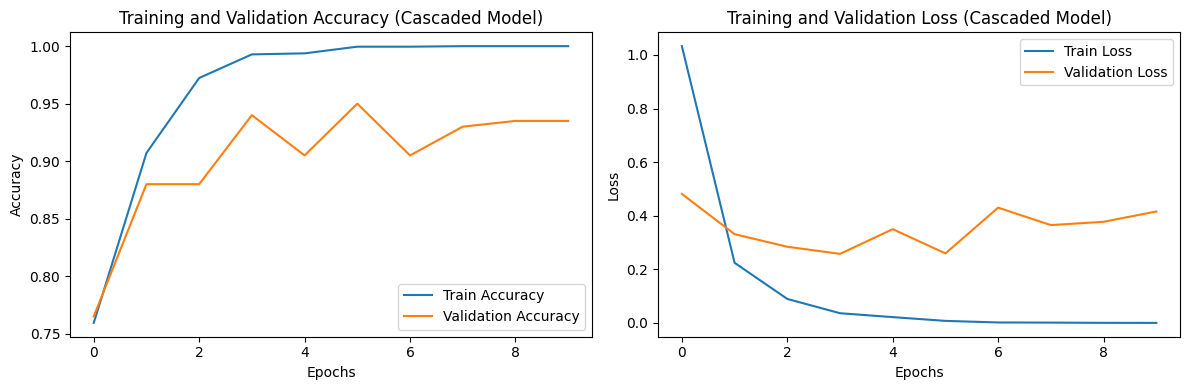

In [ ]:

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(cascaded_history.history['accuracy'], label='Train Accuracy')
plt.plot(cascaded_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (Cascaded Model)')

# Loss
plt.subplot(1, 2, 2)
plt.plot(cascaded_history.history['loss'], label='Train Loss')
plt.plot(cascaded_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Cascaded Model)')

plt.tight_layout()
plt.show()


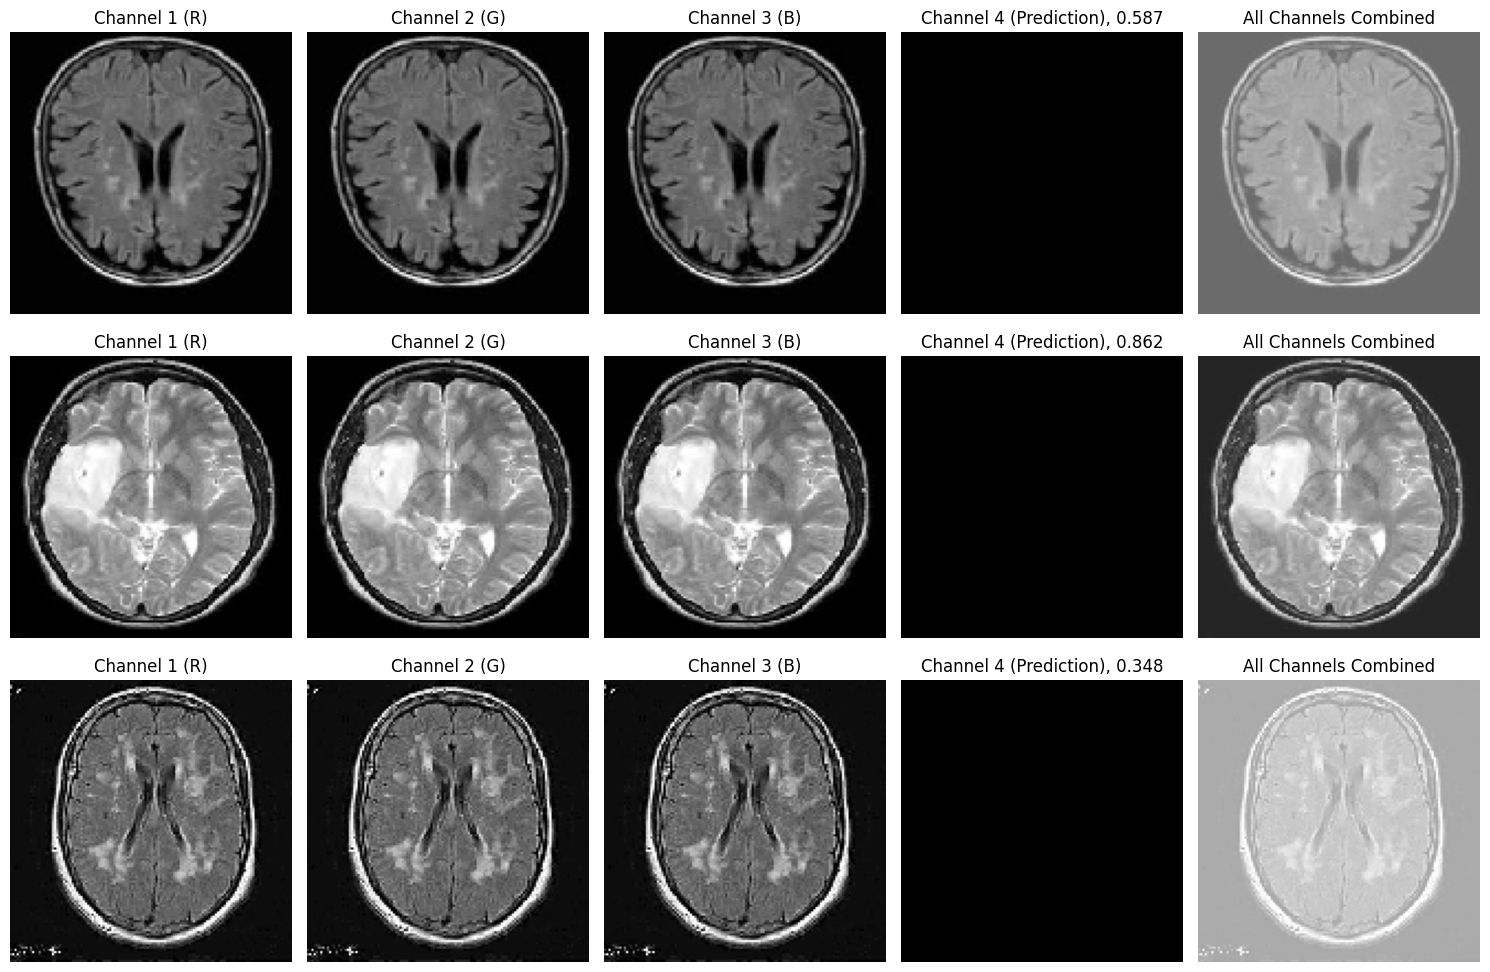

In [ ]:
import matplotlib.pyplot as plt
import random

def visualize_cascaded_inputs(concatenated_images, num_samples=3):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        index = random.randint(0, len(concatenated_images) - 1)
        concatenated_image = concatenated_images[index]

        plt.subplot(num_samples, 5, i * 5 + 1)
        plt.imshow(concatenated_image[:, :, 0], cmap='gray')
        plt.title("Channel 1 (R)")
        plt.axis("off")

        plt.subplot(num_samples, 5, i * 5 + 2)
        plt.imshow(concatenated_image[:, :, 1], cmap='gray')
        plt.title("Channel 2 (G)")
        plt.axis("off")

        plt.subplot(num_samples, 5, i * 5 + 3)
        plt.imshow(concatenated_image[:, :, 2], cmap='gray')
        plt.title("Channel 3 (B)")
        plt.axis("off")


        plt.subplot(num_samples, 5, i * 5 + 4)
        plt.imshow(concatenated_image[:, :, 3], cmap='gray')
        mean_value = np.mean(concatenated_image[:, :, 3])
        plt.title(f"Channel 4 (Prediction), {mean_value:.3f}")
        plt.axis("off")


        plt.subplot(num_samples, 5, i * 5 + 5)
        plt.imshow(concatenated_image)
        plt.title("All Channels Combined")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

random_indices = random.sample(range(len(train_images)), 4)
demo_images = [train_inputs_cascade[i] for i in random_indices]
visualize_cascaded_inputs(demo_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


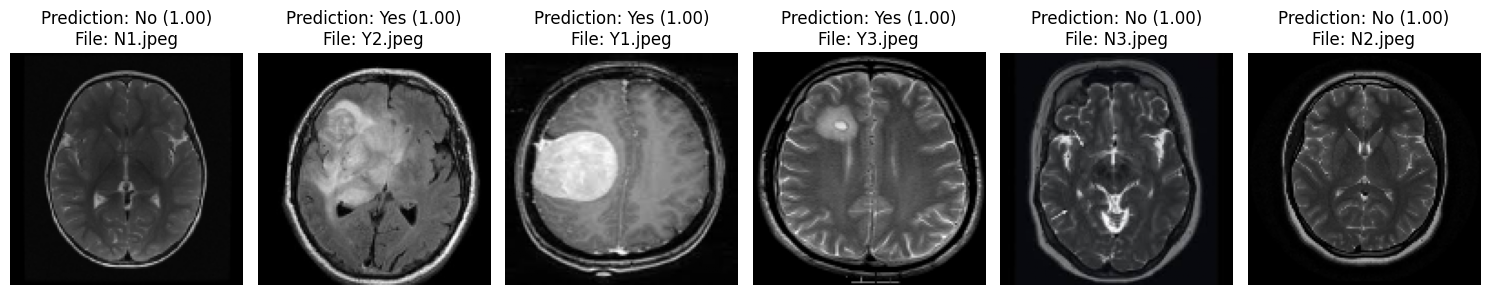

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

def load_test_images(folder_path, target_size=(128, 128)):
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)
            img = img / 255.0  # Normalize the image
            images.append(img)
            filenames.append(filename)
    return np.array(images), filenames

def prepare_cascaded_inputs(first_stage_model, images):
    first_stage_predictions = first_stage_model.predict(images)
    first_stage_predictions_resized = np.repeat(first_stage_predictions[:, np.newaxis, np.newaxis], 128, axis=1)
    first_stage_predictions_resized = np.repeat(first_stage_predictions_resized, 128, axis=2)
    cascaded_inputs = np.concatenate([images, first_stage_predictions_resized], axis=-1)
    return cascaded_inputs

def visualize_predictions(model, test_images, filenames, num_samples):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        image = test_images[i]
        filename = filenames[i]

        prediction = model.predict(image[np.newaxis, ...])[0][0]
        prediction_label = 'Yes' if prediction > 0.8 else 'No'
        prediction_prob = prediction if prediction > 0.8 else 1 - prediction

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image[:, :, :3])
        plt.title(f"Prediction: {prediction_label} ({prediction_prob:.2f})\nFile: {filename}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

folder_path = "dataset/test/"
test_images, filenames = load_test_images(folder_path)

test_inputs_cascade = prepare_cascaded_inputs(first_stage_model, test_images)

visualize_predictions(cascaded_model, test_inputs_cascade, filenames, num_samples=len(test_images))

1


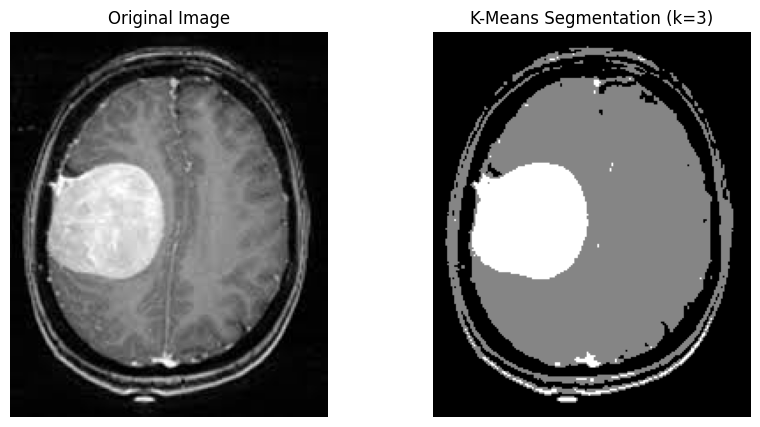

2


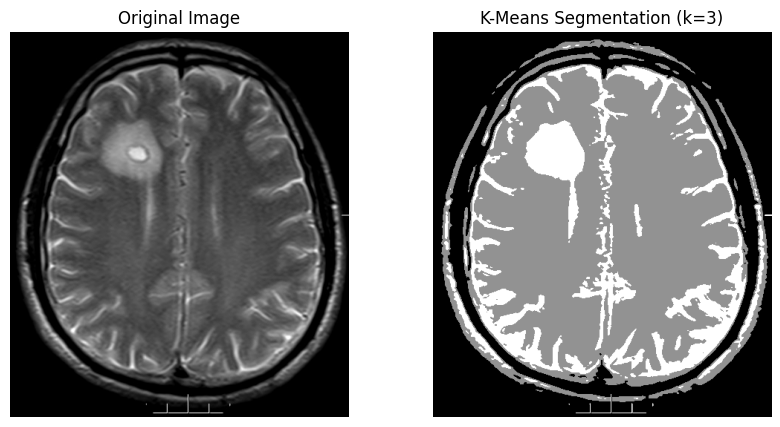

3


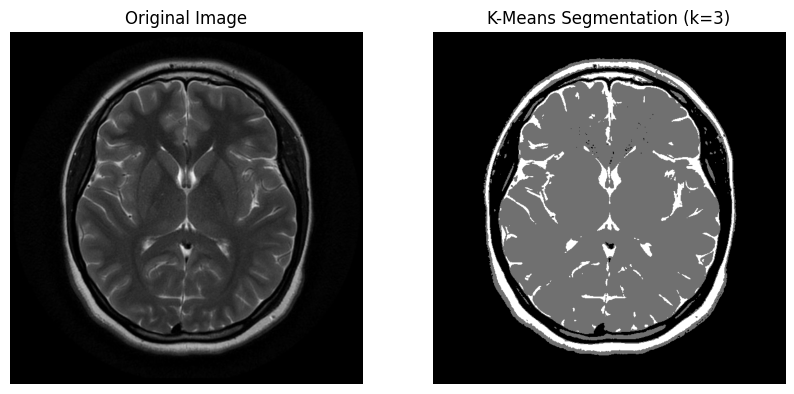

4


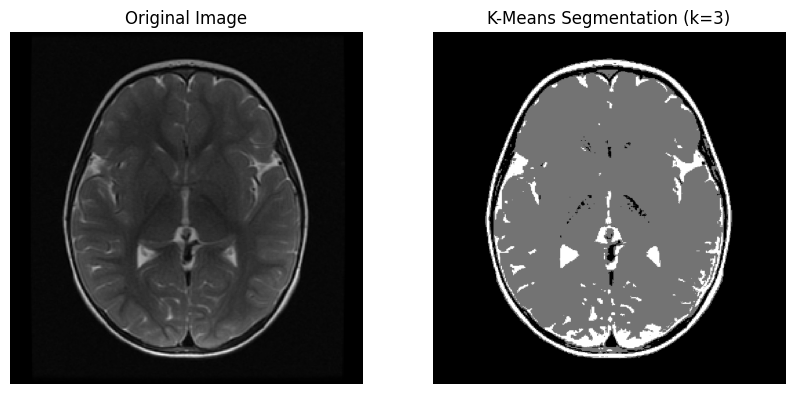

5


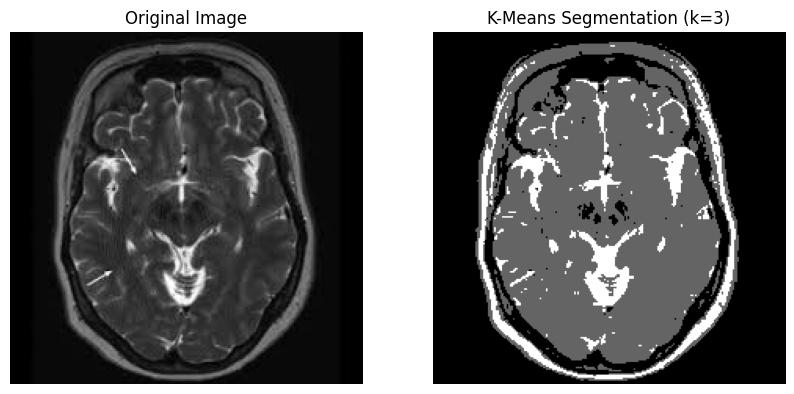

6


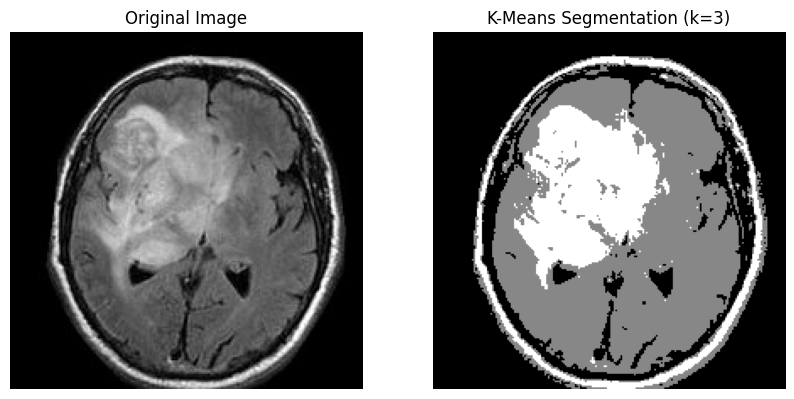

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


import os

def knn_load_test_images(folder_path, target_size=(128, 128)):
    images = []
    filenames = []
    cnt = 0
    for filename in os.listdir(folder_path):
      if cnt > 10:
        break
      if filename.endswith(".jpg") or filename.endswith(".jpeg"):
          cnt+=1
          print(cnt)
          img_path = os.path.join(folder_path, filename)
          image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

          pixel_values = image.reshape((-1, 1))
          pixel_values = np.float32(pixel_values)


          k = 3
          criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
          _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

          centers = np.uint8(centers)
          segmented_image = centers[labels.flatten()]
          segmented_image = segmented_image.reshape(image.shape)

          # Plot original and segmented image side by side
          plt.figure(figsize=(10, 5))

          plt.subplot(1, 2, 1)
          plt.imshow(image, cmap='gray')
          plt.title('Original Image')
          plt.axis('off')

          plt.subplot(1, 2, 2)
          plt.imshow(segmented_image, cmap='gray')
          plt.title('K-Means Segmentation (k=3)')
          plt.axis('off')

          plt.show()




folder_path = "dataset/test"
knn_load_test_images(folder_path)




